In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [110]:
SEED = 2038
BASE_PATH = "C:/Users/rodri/machine-learning/UFPR-IAAP/IAA008 - Aprendizado de máquina/"
np.random.seed(SEED)

Classificação da base de veículos

In [111]:
df_veiculo = pd.read_csv(BASE_PATH + "base/06 - Veículos/6 - Veiculos - Dados.csv")

In [112]:
df_veiculo.head()

,a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,MaxLRect,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,tipo
0,1,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,3,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,4,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,5,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [113]:
df_veiculo = df_veiculo.drop('a', axis=1)
df_veiculo

,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,MaxLRect,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,tipo
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [114]:
X = df_veiculo.drop('tipo', axis=1)
y = df_veiculo['tipo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED)

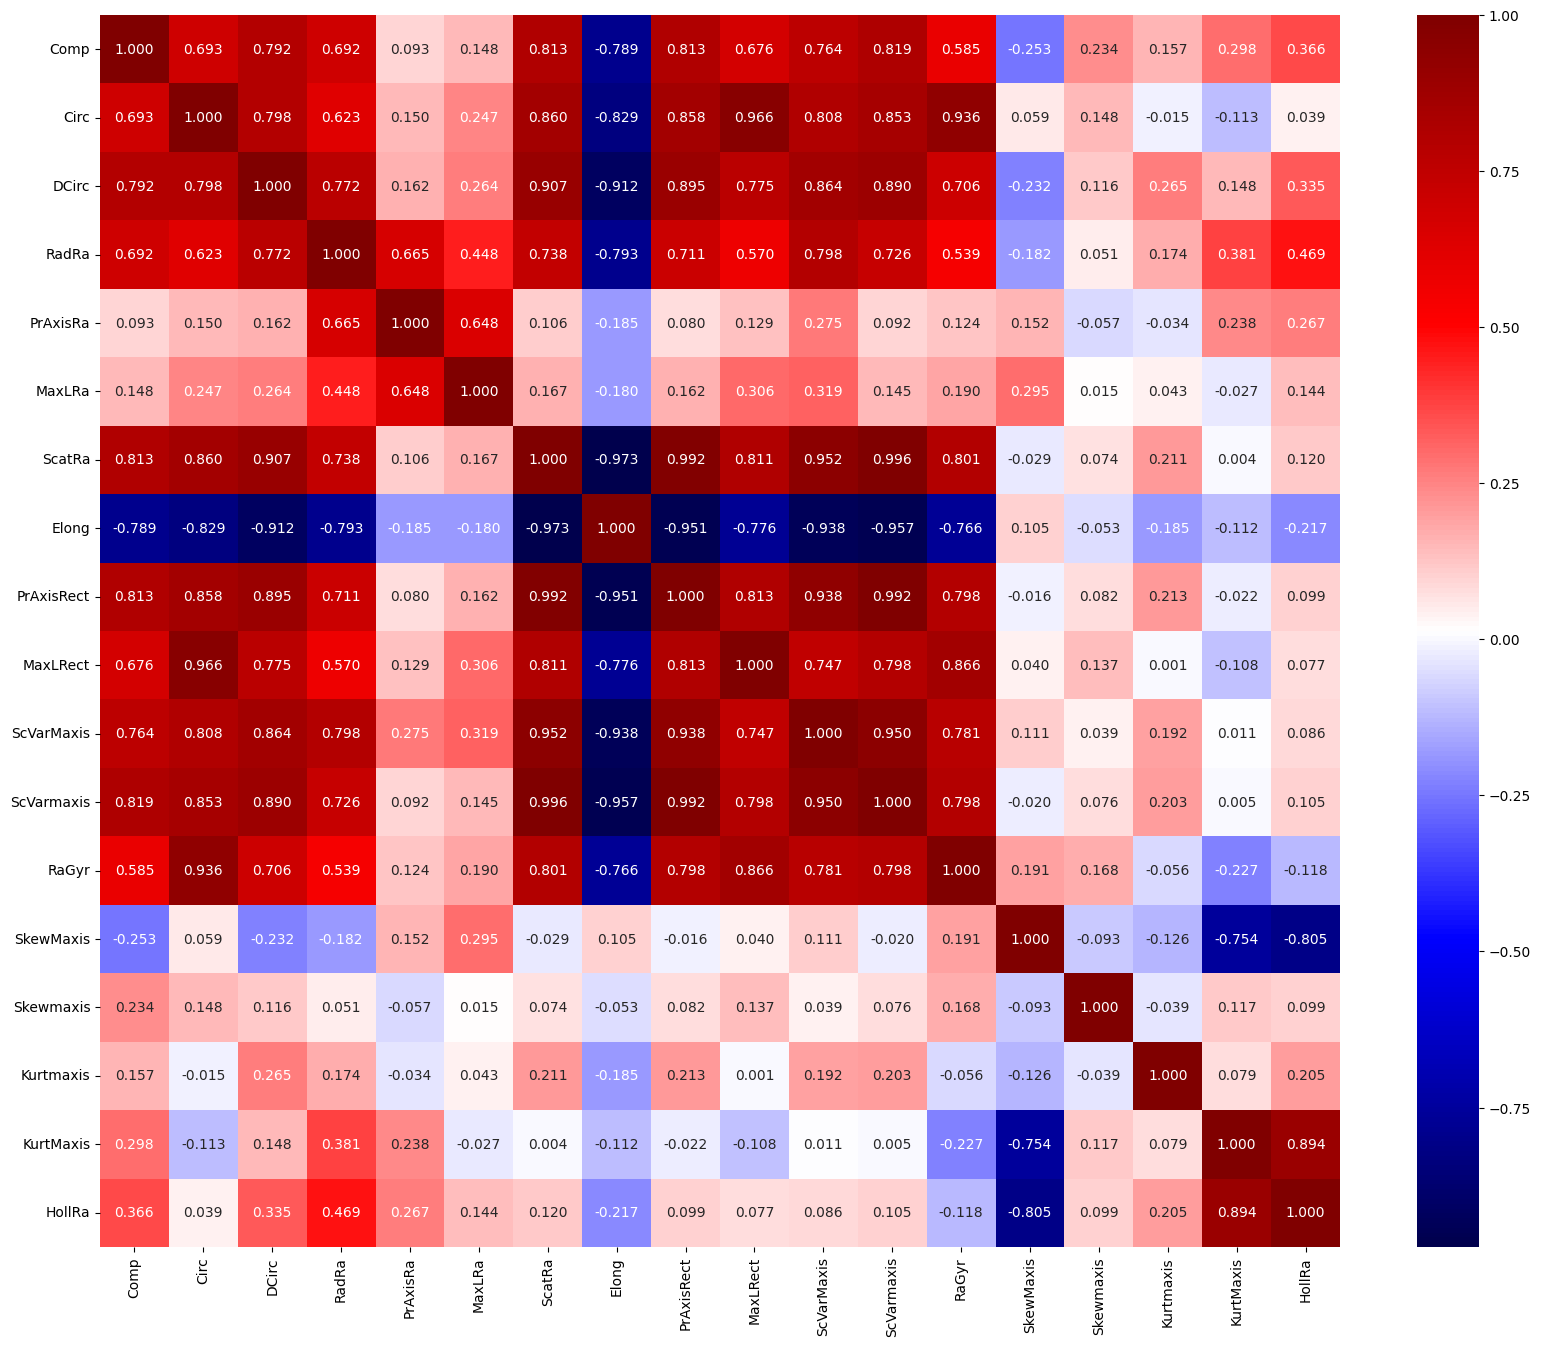

In [115]:
# Mostra gráfico de correlação
corr = X.corr(method='pearson')
plt.figure(figsize=(20, 16))
sns.heatmap(corr,cmap='seismic',annot=True, fmt=".3f")
plt.show()

Classificação com KNN

Melhores parâmetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Melhor acurácia (validação cruzada): 0.720566286215979
Acurácia no teste: 0.711764705882353
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.93      1.00      0.96        37
        opel       0.52      0.42      0.47        40
        saab       0.51      0.49      0.50        45
         van       0.83      0.94      0.88        48

    accuracy                           0.71       170
   macro avg       0.70      0.71      0.70       170
weighted avg       0.69      0.71      0.70       170



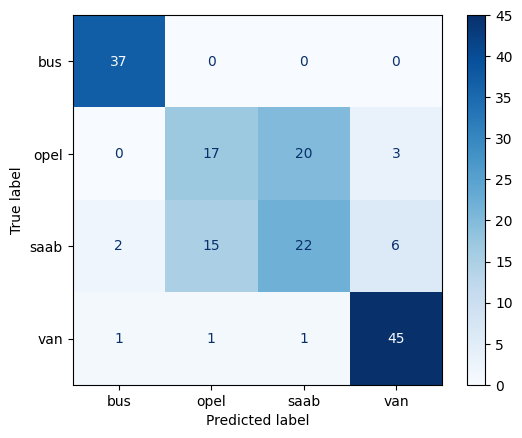

In [116]:
from sklearn.neighbors  import KNeighborsClassifier

param_grid_knn = {
    'knn__n_neighbors': [1, 3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid_search = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=10,                  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia (validação cruzada):", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred)
print("Relatório de classificação:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues')

KNN com boostraping

Melhores parâmetros: {'knn__estimator__metric': 'euclidean', 'knn__estimator__n_neighbors': 5, 'knn__estimator__weights': 'uniform'}
Melhor acurácia (validação cruzada): 0.7175153643546971
Acurácia no teste: 0.6764705882352942
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.88      0.95      0.91        37
        opel       0.52      0.42      0.47        40
        saab       0.49      0.44      0.47        45
         van       0.77      0.90      0.83        48

    accuracy                           0.68       170
   macro avg       0.66      0.68      0.67       170
weighted avg       0.66      0.68      0.66       170



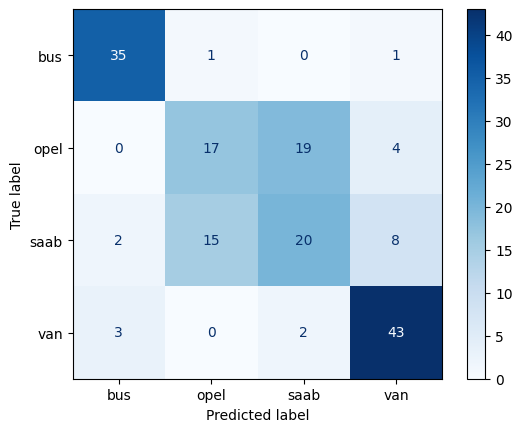

In [117]:
from sklearn.ensemble import BaggingClassifier

# Parâmetros agora se referem ao estimador dentro do Bagging
param_grid_knn = {
    'knn__estimator__n_neighbors': [1, 3, 5, 7, 9],
    'knn__estimator__weights': ['uniform', 'distance'],
    'knn__estimator__metric': ['euclidean', 'manhattan']
}

# Pipeline com Bagging (bootstrap=True por padrão)
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', BaggingClassifier(
        estimator=KNeighborsClassifier(),
        n_estimators=25,         # nº de modelos com bootstraping
        bootstrap=True,
        n_jobs=-1,
        random_state=SEED
    ))
])

# GridSearchCV com validação cruzada
grid_search = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Treinamento
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia (validação cruzada):", grid_search.best_score_)

# Avaliação no conjunto de teste
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred)
print("Relatório de classificação:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')

Classificação com RNA Hold-out

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=0.1,
                               hidden_layer_sizes=(5,), max_iter=1000,
                               random_state=2038))])
Acurácia no teste: 0.7941176470588235
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.93      1.00      0.96        37
        opel       0.65      0.55      0.59        40
        saab       0.64      0.67      0.65        45
         van       0.94      0.96      0.95        48

    accuracy                           0.79       170
   macro avg       0.79      0.79      0.79       170
weighted avg       0.79      0.79      0.79       170



C:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


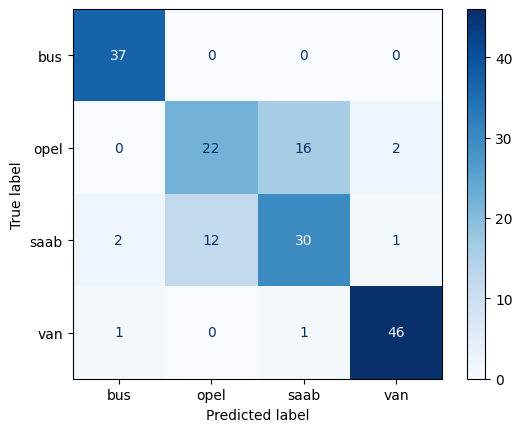

In [66]:
from sklearn.neural_network import MLPClassifier

pipeline_rna_holdout = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(5,), 
        alpha=0.1, # similar ao decay
        #activation='logistic',
        solver='adam',
        max_iter=1000, 
        random_state=SEED
    ))
])

pipeline_rna_holdout.fit(X_train, y_train)
print(pipeline_rna_holdout)
y_pred = pipeline_rna_holdout.predict(X_test)

print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_rna_holdout.named_steps['mlp'].classes_)
disp.plot(cmap='Blues')
plt.show()

Melhores parâmetros: {'mlp__activation': 'tanh', 'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (41,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Acurácia no teste: 0.8411764705882353
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        37
        opel       0.70      0.70      0.70        40
        saab       0.74      0.71      0.73        45
         van       0.94      0.98      0.96        48

    accuracy                           0.84       170
   macro avg       0.84      0.84      0.84       170
weighted avg       0.84      0.84      0.84       170



C:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


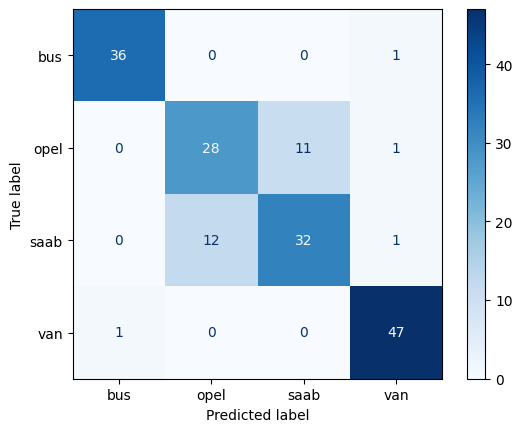

In [64]:
pipeline_rna_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=SEED))
])

param_grid_rna_cv = {
    'mlp__hidden_layer_sizes': [(1,),(11,),(21,),(31,),(41,)],
    'mlp__activation': ['tanh'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': list(np.arange(0.1, 0.9, 0.3)),
    'mlp__learning_rate': ['constant', 'adaptive']
}

grid_search_rna = GridSearchCV(
    pipeline_rna_cv,
    param_grid_rna_cv,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_rna.fit(X_train, y_train)

best_rna = grid_search_rna.best_estimator_
y_pred = best_rna.predict(X_test)

print("Melhores parâmetros:", grid_search_rna.best_params_)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rna.named_steps['mlp'].classes_)
disp.plot(cmap='Blues')
plt.show()

Classificação com SVM Hold-out

Acurácia no teste: 0.7411764705882353
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.95      0.97      0.96        37
        opel       0.53      0.42      0.47        40
        saab       0.58      0.58      0.58        45
         van       0.85      0.98      0.91        48

    accuracy                           0.74       170
   macro avg       0.73      0.74      0.73       170
weighted avg       0.73      0.74      0.73       170



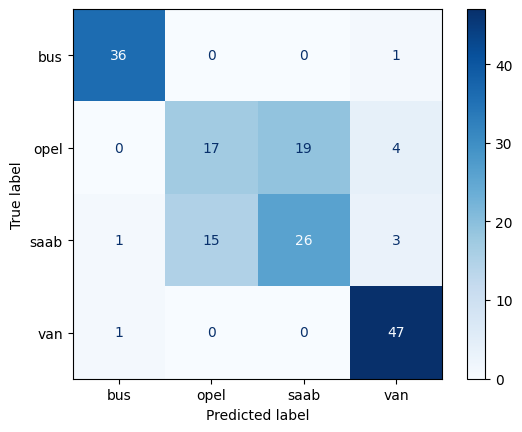

In [118]:
from sklearn.svm import SVC

def sigma_to_gamma(sigma_values):
    gamma_values = [1 / (2 * sigma ** 2) for sigma in sigma_values]
    return gamma_values

pipeline_svm_h = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state = SEED
    ))
])

pipeline_svm_h.fit(X_train, y_train)
y_pred = pipeline_svm_h.predict(X_test)

print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_svm_h.named_steps['svc'].classes_)
disp.plot(cmap='Blues')
plt.show()

SVM CV

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=50))])
Acurácia no teste: 0.8411764705882353
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        37
        opel       0.76      0.70      0.73        40
        saab       0.72      0.73      0.73        45
         van       0.92      0.96      0.94        48

    accuracy                           0.84       170
   macro avg       0.84      0.84      0.84       170
weighted avg       0.84      0.84      0.84       170



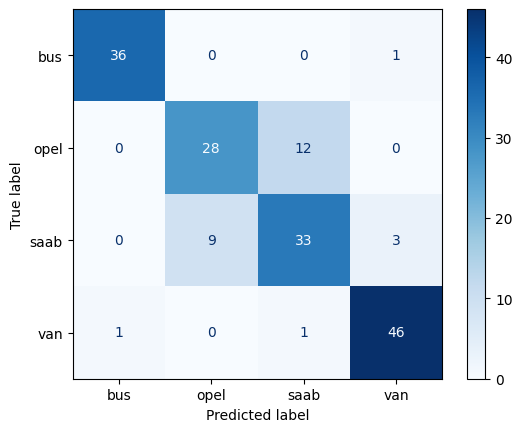

In [79]:
from sklearn.svm import SVC

def sigma_to_gamma(sigma_values):
    gamma_values = [1 / (2 * sigma ** 2) for sigma in sigma_values]
    return gamma_values

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

param_grid_svm = {
    'svc__C' : [1,2,10,50,100],
    'svc__gamma' : ['scale', 'auto']#sigma_to_gamma([.01,.015,.2])
}
grid_search_svm = GridSearchCV(
    pipeline_svm,
    param_grid_svm,
    cv=10,
    n_jobs=-1
)

grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

y_pred = best_svm.predict(X_test)
print(grid_search_svm.best_estimator_)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.named_steps['svc'].classes_)
disp.plot(cmap='Blues')
plt.show()

Classificação com Random Forest

Acurácia no teste: 0.788235294117647
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        37
        opel       0.68      0.65      0.67        40
        saab       0.68      0.56      0.61        45
         van       0.81      0.98      0.89        48

    accuracy                           0.79       170
   macro avg       0.79      0.79      0.78       170
weighted avg       0.78      0.79      0.78       170



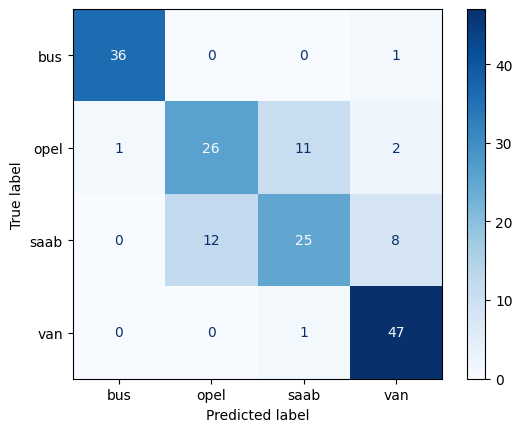

In [120]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf_h = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
        random_state=SEED
    ))
])

pipeline_rf_h.fit(X_train, y_train)
y_pred = pipeline_rf_h.predict(X_test)

print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_rf_h.named_steps['rf'].classes_)
disp.plot(cmap='Blues')
plt.show()

C:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rodri\App

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=11, max_features=7,
                                        random_state=2038))])
Acurácia no teste: 0.8411764705882353
Relatório de classificação:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        37
        opel       0.76      0.70      0.73        40
        saab       0.72      0.73      0.73        45
         van       0.92      0.96      0.94        48

    accuracy                           0.84       170
   macro avg       0.84      0.84      0.84       170
weighted avg       0.84      0.84      0.84       170



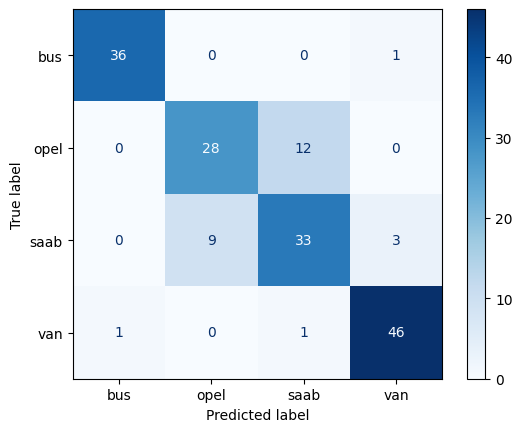

In [85]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=SEED))
])

param_grid_rf = {
    'rf__max_features' : [2,5,7,9], #mtry
    'rf__n_estimators': list(range(100, 120, 10)),
    'rf__max_depth': list(range(1, 20, 10)),
    'rf__min_samples_split': list(range(1, 3, 1)),
    'rf__min_samples_leaf': list(range(1, 3, 1))
}
grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv=10,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_svm.best_estimator_

y_pred = best_rf.predict(X_test)
print(grid_search_rf.best_estimator_)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.named_steps['svc'].classes_)
disp.plot(cmap='Blues')
plt.show()

### Classificação com variáveis categóricas

In [123]:
df_banco = pd.read_csv("C:/Users/rodri/machine-learning/UFPR-IAAP/IAA008 - Aprendizado de máquina/00 - Práticas em Python/4 - Banco/Banco - Dados.csv")
df_banco.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,bluecollar,married,secondary,no,0,yes,no,no


In [152]:
print(df_banco['job'].unique())
print(df_banco['marital'].unique())
print(df_banco['education'].unique())
print(df_banco['y'].value_counts())

['unemployed' 'services' 'management' 'bluecollar' 'selfemployed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
y
no     262
yes     38
Name: count, dtype: int64


In [154]:
y = df_banco['y']
X = df_banco.drop('y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [155]:
cat_columns = ['job', 'marital', 'default', 'housing', 'loan']

ord_columns = ['education']
education_order = [['unknown', 'primary', 'secondary', 'tertiary']]
num_columns = ['age', 'balance']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_columns),
    ('cat', OneHotEncoder(), cat_columns),
    ('ord', OrdinalEncoder(categories=education_order), ord_columns)
])

X_processed = preprocessor.fit_transform(df_banco)
print(X_processed)

# Obter nomes das colunas codificadas
ohe = preprocessor.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_columns)

# Colunas numéricas e ordinais
final_columns = num_columns + list(ohe_features) + ord_columns

# Transformar para DataFrame
df_processed = pd.DataFrame(X_processed, columns=final_columns)

df_processed.head()

[[-1.00663659  0.11000807  0.         ...  1.          0.
   1.        ]
 [-0.72298821  1.32397758  0.         ...  0.          1.
   2.        ]
 [-0.53388929 -0.06670901  0.         ...  1.          0.
   3.        ]
 ...
 [ 0.41160532 -0.48686701  0.         ...  1.          0.
   1.        ]
 [-0.25024091 -0.37282991  0.         ...  0.          1.
   2.        ]
 [-0.81753767 -0.30570168  0.         ...  1.          0.
   2.        ]]


,age,balance,job_admin.,job_bluecollar,job_entrepreneur,job_housemaid,job_management,job_retired,job_selfemployed,job_services,...,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,education
0,-1.006637,0.110008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.722988,1.323978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
2,-0.533889,-0.066709,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
3,-1.006637,-0.015756,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
4,1.735298,-0.612631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


In [156]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('knn', KNeighborsClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f"Accuracy: %.4f", accuracy_score(y_test, y_pred))
print("Métricas\n", classification_report(y_test, y_pred))


Accuracy: %.4f 0.8833333333333333
Métricas
               precision    recall  f1-score   support

          no       0.88      1.00      0.94        52
         yes       1.00      0.12      0.22         8

    accuracy                           0.88        60
   macro avg       0.94      0.56      0.58        60
weighted avg       0.90      0.88      0.84        60



### Regressão

In [165]:
df_alunos = pd.read_csv("C:/Users/rodri/machine-learning/UFPR-IAAP/IAA008 - Aprendizado de máquina/00 - Práticas em Python/3 - Alunos/Alunos - Dados.csv")

pd.set_option('display.max_columns', None)
print(df_alunos.head())
pd.reset_option('display.max_columns')

df = df_alunos

  school  sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP    2   18       U     GT3       A     4     4  at_home   teacher   
1     GP    2   17       U     GT3       T     1     1  at_home     other   
2     GP    2   15       U     LE3       T     1     1  at_home     other   
3     GP    2   15       U     GT3       T     4     2   health  services   
4     GP    2   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Da

In [166]:
# LabelEncoder
le = LabelEncoder()
df['school'] = le.fit_transform(df['school'])
df['address'] = le.fit_transform(df['address'])
df['famsize'] = le.fit_transform(df['famsize'])
df['Pstatus'] = le.fit_transform(df['Pstatus'])
df['Mjob'] = le.fit_transform(df['Mjob'])
df['Fjob'] = le.fit_transform(df['Fjob'])
df['reason'] = le.fit_transform(df['reason'])
df['guardian'] = le.fit_transform(df['guardian'])
df['schoolsup'] = le.fit_transform(df['schoolsup'])
df['famsup'] = le.fit_transform(df['famsup'])
df['paid'] = le.fit_transform(df['paid'])
df['activities'] = le.fit_transform(df['activities'])
df['nursery'] = le.fit_transform(df['nursery'])
df['higher'] = le.fit_transform(df['higher'])
df['internet'] = le.fit_transform(df['internet'])
df['romantic'] = le.fit_transform(df['romantic'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,2,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,2,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,2,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,2,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,2,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [176]:
from sklearn.neural_network import MLPRegressor

y = df['G3']
X = df.drop('G3', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_grid = {
     'mlp__hidden_layer_sizes': [(100,)],
     'mlp__max_iter': [1000],
     'mlp__activation': ['tanh'],
     'mlp__solver': ['sgd'],
     'mlp__alpha': [0.0002],
     'mlp__learning_rate': ['constant']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=SEED))
])

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=10,
    refit=True,
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_rna = grid.best_estimator_
print(best_rna)
y_pred = best_rna.predict(X_test)
print("Resultado Alunos RNA HOLD-OUT:")
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(activation='tanh', alpha=0.0002, max_iter=1000,
                              random_state=2038, solver='sgd'))])
Resultado Alunos RNA HOLD-OUT:
MSE:  4.181719767409123
R2:  0.7842952883015097


C:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Agrupamento - Móveis

In [189]:
df = pd.read_csv("C:/Users/rodri/machine-learning/UFPR-IAAP/IAA008 - Aprendizado de máquina/00 - Práticas em Python/11 - Agrupamento - Praticas - 2 - Moveis/Moveis - Dados.csv", encoding='latin1')
df.head()

,categoria,cor,estilo
0,Quarto Juvenil / Guarda-roupas / Guarda-roupas...,Branco Linho Gelo/Azul/Branco Linho,tradicional
1,Quarto Juvenil / Guarda-roupas / Guarda-roupas...,Branco Linho Gelo/Rosa/Azul,tradicional
2,Quarto Juvenil / Guarda-roupas / Guarda-roupas...,Branco Linho Gelo/Azul/Branco Linho,tradicional
3,Quarto Juvenil / Guarda-roupas / Guarda-roupas...,Branco Linho Gelo/Rosa/Azul,tradicional
4,Quarto Infantil / Comoda,Branco Linho Gelo/Azul/Branco Linho,tradicional


In [191]:
from sklearn.cluster import KMeans

le = LabelEncoder()

dfg = df.copy()
dfg['categoria'] = le.fit_transform(df['categoria'])
dfg['cor'] = le.fit_transform(df['cor'])
dfg['estilo'] = le.fit_transform(df['estilo'])

kmeans = KMeans(n_clusters=5)
kmeans.fit(dfg)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df['cluster'] = labels

print(df.head(30))

                                            categoria  \
0   Quarto Juvenil / Guarda-roupas / Guarda-roupas...   
1   Quarto Juvenil / Guarda-roupas / Guarda-roupas...   
2   Quarto Juvenil / Guarda-roupas / Guarda-roupas...   
3   Quarto Juvenil / Guarda-roupas / Guarda-roupas...   
4                            Quarto Infantil / Comoda   
5                            Quarto Infantil / Comoda   
6                            Quarto Infantil / Comoda   
7                            Quarto Infantil / Comoda   
8                               Quarto Juvenil / Cama   
9                               Quarto Juvenil / Cama   
10  Quarto do Bebe / Guarda-roupas / Guarda-roupas...   
11  Quarto do Bebe / Guarda-roupas / Guarda-roupas...   
12  Quarto do Bebe / Guarda-roupas / Guarda-roupas...   
13                    Quarto do Bebe / Bercos / Berco   
14                 Quarto / Camas / Camas de solteiro   
15                            Quarto Juvenil / Bicama   
16                            Q

## Regras de Associação - Lista de Compras

In [194]:
df = pd.read_csv("C:/Users/rodri/machine-learning/UFPR-IAAP/IAA008 - Aprendizado de máquina/00 - Práticas em Python/12 - Regras de Associacao - Praticas – 1 - Lista de Compras/Lista de Compras - Dados - Python.csv", encoding='latin1')
df.head()

,leite;pao;bolacha;suco
0,leite;suco
1,leite;ovos
2,pao;bolacha;caf


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

with open("C:/Users/rodri/machine-learning/UFPR-IAAP/IAA008 - Aprendizado de máquina/00 - Práticas em Python/12 - Regras de Associacao - Praticas – 1 - Lista de Compras/Lista de Compras - Dados - Python.csv", 'r') as file:
    transactions = [line.strip().split(';') for line in file]

# 2. Transformar os dados em formato binário (one-hot encoding)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 3. Aplicar o algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# 4. Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Exibir resultados
print("Itens frequentes:")
print(frequent_itemsets)

print("\nRegras de associação:")
print(rules)